In [94]:
import sys
import matplotlib
matplotlib.use('Agg')

import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
df = pandas.read_csv("./hr_train_1.csv")

Code function to convert dataframe ignore from string (true or false ) to (0 or  1)

In [95]:
# Code function to convert dataframe ignore from string (true or false ) to (0 or  1)
ignore = df["ignore"]
ignoreList = []
ignoreList.clear

for x in range(len(ignore)):
    value = (str(ignore.iloc[x]))
    if value == 'True':
        ignoreList.append(1)
    else:
        ignoreList.append(0)

In [92]:
df["ignore"]=ignoreList
d = {'Senior': 3, 'Mid': 2, 'Junior': 1}
df['level'] = df['level'].map(d)

d = {'Java': 1, 'Python': 2, 'R': 3}
df['lang'] = df['lang'].map(d)

d = {'no': 0, 'yes': 1}
df['tweets'] = df['tweets'].map(d)

d = {'no': 0, 'yes': 1}
df['phd'] = df['phd'].map(d)


# Calculate Total Results:

In [35]:
features = ['level', 'lang', 'tweets', 'phd']

X = df[features]
y = df['ignore']

dtree = DecisionTreeClassifier()

dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)
total = tree.plot_tree(dtree, feature_names=features)
print("Here we can see clear that we have",len(total) ,"part of visualize trained decision tree.")

Here we can see clear that we have 25 part of visualize trained decision tree.


Mest förekommande beslutspunkter:
Feature: tweets, Antal gånger: 13
Feature: level, Antal gånger: 4
Feature: lang, Antal gånger: 4
Feature: phd, Antal gånger: 3
Feature: tweets, Antal gånger: 1
decision importances =  [0.16941869 0.29779662 0.34385832 0.18892636]
2


In [57]:
print(f"Total results: {len(df)}")

Total results: 1014


# Find the Shortest Path


In [80]:
print( f"The shortest path is {dtree.min_samples_split}")

The shortest path is 2


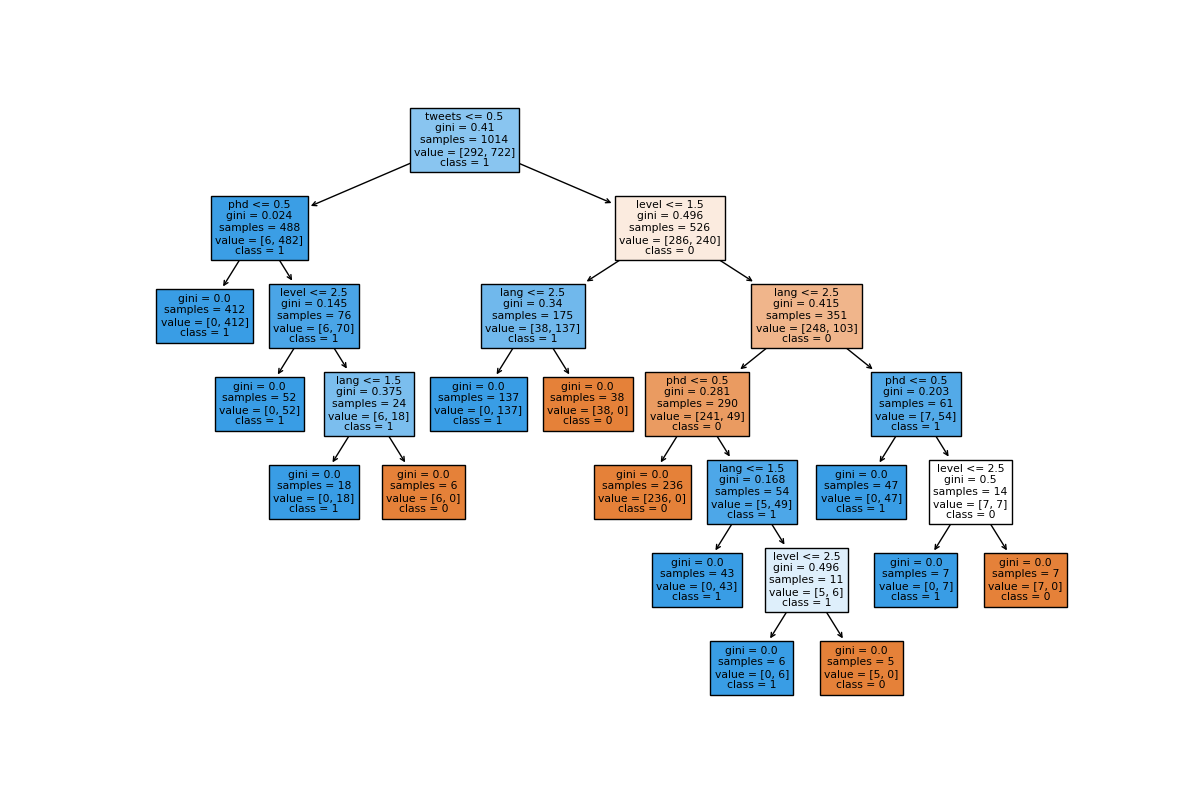

In [59]:
from IPython.display import Image, display
image_path = './decision_tree.png'
display(Image(filename=image_path))

In [90]:
from collections import Counter

# Hämta indexen för de använda funktionerna vid beslutspunkterna
decision_features = dtree.tree_.feature

feature_importances  = dtree.feature_importances_
# Räkna antalet gånger varje beslutspunkt används
decision_counts = Counter(decision_features)

# Hitta de mest förekommande beslutspunkterna
most_common_decisions = decision_counts.most_common()

print("Mest förekommande beslutspunkter:")
for feature_index, count in most_common_decisions:
    feature_name = features[feature_index]  # Omvandla index till feature-namn om det behövs
    print(f"Feature: {feature_name}, Antal gånger: {count}")
print("feature importances för att identifiera vilka features som är mest relevanta i ditt beslutsträd.")
print ("decision importances = ",feature_importances )
print(dtree.min_samples_split)

Mest förekommande beslutspunkter:
Feature: tweets, Antal gånger: 13
Feature: level, Antal gånger: 4
Feature: lang, Antal gånger: 4
Feature: phd, Antal gånger: 3
Feature: tweets, Antal gånger: 1
feature importances för att identifiera vilka features som är mest relevanta i ditt beslutsträd.
decision importances =  [0.16941869 0.29779662 0.34385832 0.18892636]
2
